In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve, root

### Задание 1

f(x) = 1.2 - ln x - 4 sin 2x = 0
Интервалы, где функция меняет знак:
[0.311, 0.316] -> f(0.311) = 0.038, f(0.316) = -0.009
[1.464, 1.468] -> f(1.464) = -0.032, f(1.468) = 0.003
[3.146, 3.151] -> f(3.146) = 0.019, f(3.151) = -0.022
[4.755, 4.760] -> f(4.755) = -0.021, f(4.760) = 0.017


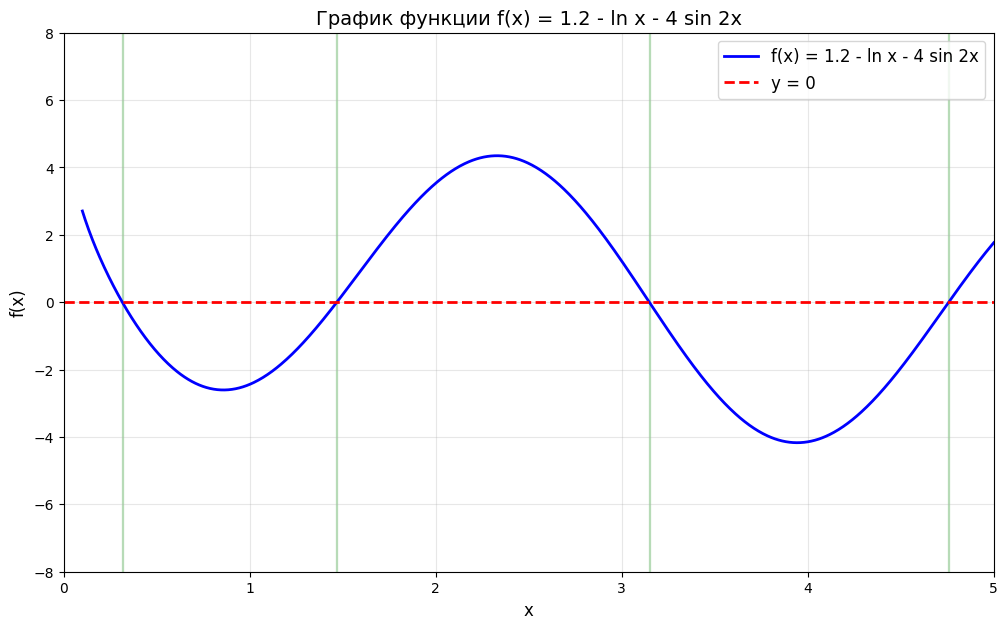

Найдены следующие интервалы с корнями:
Корень 1: x ∈ [0.311, 0.316]
Корень 2: x ∈ [1.464, 1.468]
Корень 3: x ∈ [3.146, 3.151]
Корень 4: x ∈ [4.755, 4.760]


In [12]:
def f(x):
    return 1.2 - math.log(x) - 4 * math.sin(2*x)

print("f(x) = 1.2 - ln x - 4 sin 2x = 0")


# массив значений x
x_vals = np.linspace(0.1, 5, 1000)
y_vals = [f(x) for x in x_vals]

# график
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = 1.2 - ln x - 4 sin 2x')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='y = 0')
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('График функции f(x) = 1.2 - ln x - 4 sin 2x', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(-8, 8)

# интервалы, где функция меняет знак
intervals = []
print("Интервалы, где функция меняет знак:")

for i in range(len(x_vals)-1):
    if y_vals[i] * y_vals[i+1] < 0:
        a, b = x_vals[i], x_vals[i+1]
        intervals.append((a, b))
        plt.axvspan(a, b, alpha=0.2, color='green')
        print(f"[{a:.3f}, {b:.3f}] -> f({a:.3f}) = {y_vals[i]:.3f}, f({b:.3f}) = {y_vals[i+1]:.3f}")

plt.show()

print("Найдены следующие интервалы с корнями:")

for i, (a, b) in enumerate(intervals, 1):
    print(f"Корень {i}: x ∈ [{a:.3f}, {b:.3f}]")

### Задание 2

In [13]:
def f(x):
    return 1.2 - math.log(x) - 4 * math.sin(2*x)

print("f(x) = 1.2 - ln x - 4 sin 2x = 0")
print("Точность: ε = 0.001")

# начальный интервал
print("Из задания 1 выбираем интервал для первого корня:")
a = float(input("Введите левую границу интервала a = "))
b = float(input("Введите правую границу интервала b = "))
eps = 0.001

print("\nРучная расчетная таблица:")
print(f"{'№':<3} {'a':<10} {'b':<10} {'x':<10} {'f(a)':<12} {'f(b)':<12} {'f(x)':<12} {'|b-a|':<10}")

iteration = 0
while (b - a) > eps:
    x = (a + b) / 2
    fa = f(a)
    fb = f(b)
    fx = f(x)
    
    print(f"{iteration+1:<3} {a:<10.4f} {b:<10.4f} {x:<10.4f} {fa:<12.4f} {fb:<12.4f} {fx:<12.4f} {b-a:<10.4f}")
    
    if abs(fx) < eps:
        break
        
    if fa * fx < 0:
        b = x
    else:
        a = x
    
    iteration += 1
    
    if iteration > 100:
        break

x = (a + b) / 2

print(f"\nРЕЗУЛЬТАТ:")
print(f"Корень уравнения: x = {x:.6f}")
print(f"Значение функции: f(x) = {f(x):.6f}")
print(f"Число итераций: {iteration}")
print(f"Достигнутая точность: {b-a:.6f}")

f(x) = 1.2 - ln x - 4 sin 2x = 0
Точность: ε = 0.001
Из задания 1 выбираем интервал для первого корня:

Ручная расчетная таблица:
№   a          b          x          f(a)         f(b)         f(x)         |b-a|     

РЕЗУЛЬТАТ:
Корень уравнения: x = 5.000000
Значение функции: f(x) = 1.766647
Число итераций: 0
Достигнутая точность: -2.000000


### Задание 3

In [14]:
def f(x):
    return 1.2 - math.log(x) - 4 * math.sin(2*x)

def phi(x):
    return math.exp(1.2 - 4 * math.sin(2*x))

print("Уравнение: 1.2 - ln x = 4 sin 2x")
print("Приводим к виду: x = e^(1.2 - 4 sin 2x)")
print("Точность: ε = 0.00001")


# начальное приближение
x0 = float(input("Введите начальное приближение x0 = "))
eps = 0.00001
max_iter = 50

print("\nТаблица итераций:")
print(f"{'№':<5} {'x':<15} {'φ(x)':<15} {'|x - φ(x)|':<15} {'f(x)':<15}")

x = x0
for i in range(max_iter):
    x_next = phi(x)
    diff = abs(x_next - x)
    fx = f(x_next)
    
    print(f"{i+1:<5} {x:<15.8f} {x_next:<15.8f} {diff:<15.8f} {fx:<15.8f}")
    
    if diff < eps:
        break
        
    x = x_next

print(f"\nРЕЗУЛЬТАТ:")
print(f"Корень уравнения: x = {x_next:.8f}")
print(f"Значение функции: f(x) = {f(x_next):.8f}")
print(f"Число итераций: {i+1}")
print(f"Достигнутая точность: {diff:.8f}")

Уравнение: 1.2 - ln x = 4 sin 2x
Приводим к виду: x = e^(1.2 - 4 sin 2x)
Точность: ε = 0.00001

Таблица итераций:
№     x               φ(x)            |x - φ(x)|      f(x)           
1     4.00000000      0.06345445      3.93654555      3.45115896     
2     0.06345445      2.00115792      1.93770347      3.53953081     
3     2.00115792      68.94139406     66.94023614     -1.67185848    
4     68.94139406     12.95391814     55.98747592     -4.16053423    
5     12.95391814     0.20207105      12.75184710     1.22621548     
6     0.20207105      0.68872002      0.48664897      -2.35253892    
7     0.68872002      0.06551610      0.62320392      3.40282911     
8     0.06551610      1.96869275      1.90317665      3.38030467     
9     1.96869275      57.83964339     55.87095064     -4.98120377    
10    57.83964339     0.39711500      57.44252839     -0.72976736    
11    0.39711500      0.19141782      0.20569719      1.35908740     
12    0.19141782      0.74512051      0.553702

### Задание 4

In [15]:
def f(x):
    return 1.2 - math.log(x) - 4 * math.sin(2*x)

def df(x):
    return -1/x - 8 * math.cos(2*x)

print("Уравнение: 1.2 - ln x = 4 sin 2x")
print("Точность: ε = 0.00001")

# начальный интервал
a = float(input("Введите левую границу интервала a = "))
b = float(input("Введите правую границу интервала b = "))
eps = 0.00001

print("\nПроверка условий сходимости:")
print(f"f({a}) = {f(a):.6f}")
print(f"f({b}) = {f(b):.6f}")
print(f"f'({a}) = {df(a):.6f}")
print(f"f'({b}) = {df(b):.6f}")

# неподвижный конец
if f(a) * df(a) > 0:
    x0 = a
    x1 = b
    print(f"\nНеподвижный конец: a = {a}")
else:
    x0 = b
    x1 = a
    print(f"\nНеподвижный конец: b = {b}")

print("\nТаблица итераций:")
print(f"{'№':<5} {'x_хорд':<15} {'x_касат':<15} {'|x_х - x_к|':<15} {'f(x_х)':<15}")

iteration = 0
while True:
    # Метод хорд
    x_horda = x0 - f(x0) * (x1 - x0) / (f(x1) - f(x0))
    
    # Метод касательных
    x_kasat = x0 - f(x0) / df(x0)
    
    diff = abs(x_horda - x_kasat)
    
    print(f"{iteration+1:<5} {x_horda:<15.8f} {x_kasat:<15.8f} {diff:<15.8f} {f(x_horda):<15.8f}")
    
    if diff < eps:
        x = (x_horda + x_kasat) / 2
        break
    
    x0 = x_horda
    x1 = x_kasat
    iteration += 1
    
    if iteration > 100:
        break

print(f"\nРЕЗУЛЬТАТ:")
print(f"Корень уравнения: x = {x:.8f}")
print(f"Значение функции: f(x) = {f(x):.8f}")
print(f"Число итераций: {iteration + 1}")
print(f"Достигнутая точность: {diff:.8f}")

Уравнение: 1.2 - ln x = 4 sin 2x
Точность: ε = 0.00001

Проверка условий сходимости:
f(5.0) = 1.766647
f(4.0) = -4.143727
f'(5.0) = 6.512572
f'(4.0) = 0.914000

Неподвижный конец: a = 5.0

Таблица итераций:
№     x_хорд          x_касат         |x_х - x_к|     f(x_х)         
1     4.70109395      4.72873291      0.02763896      -0.43814782    
2     4.75736207      4.75737322      0.00001116      -0.00039355    
3     4.75741280      4.75741280      0.00000000      -0.00000000    

РЕЗУЛЬТАТ:
Корень уравнения: x = 4.75741280
Значение функции: f(x) = -0.00000000
Число итераций: 3
Достигнутая точность: 0.00000000


### Задание 5

Уравнение: 1.2 - ln x = 4 sin 2x
Поиск всех корней:
Начальное приближение 0.5: x = 0.31485515
                    f(x) = -0.00000000
Начальное приближение 1.5: x = 1.46806858
                    f(x) = 0.00000000
Начальное приближение 2.5: x = 3.14823750
                    f(x) = 0.00000000
ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
Корень 1: x = 0.31485515
        f(x) = -0.00000000

Корень 2: x = 1.46806858
        f(x) = 0.00000000

Корень 3: x = 3.14823750
        f(x) = 0.00000000



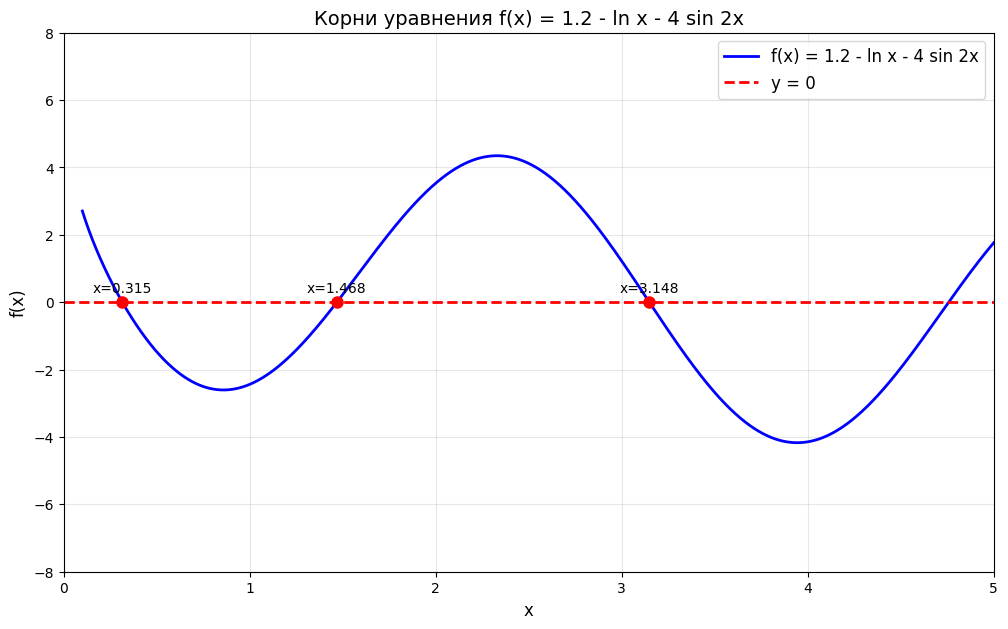

In [17]:
def f(x):
    return 1.2 - math.log(x) - 4 * math.sin(2*x)

def f_array(x):
    return 1.2 - np.log(x) - 4 * np.sin(2*x)

print("Уравнение: 1.2 - ln x = 4 sin 2x")

# из задания 1
initial_guesses = [0.5, 1.5, 2.5, 3.5]

print("Поиск всех корней:")

roots = []
for x0 in initial_guesses:
    x_root = fsolve(f_array, x0)[0]
    
    # проверка
    is_new = True
    for r in roots:
        if abs(x_root - r) < 0.01:
            is_new = False
            break
    
    if is_new and x_root > 0:
        roots.append(x_root)
        print(f"Начальное приближение {x0}: x = {x_root:.8f}")
        print(f"                    f(x) = {f(x_root):.8f}")

print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
for i, r in enumerate(sorted(roots), 1):
    print(f"Корень {i}: x = {r:.8f}")
    print(f"        f(x) = {f(r):.8f}")
    print()

# график
x_vals = np.linspace(0.1, 5, 1000)
y_vals = f_array(x_vals)

plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = 1.2 - ln x - 4 sin 2x')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='y = 0')
plt.grid(True, alpha=0.3)

for r in roots:
    plt.plot(r, f(r), 'ro', markersize=8)
    plt.text(r, f(r)+0.3, f'x={r:.3f}', fontsize=10, ha='center')

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Корни уравнения f(x) = 1.2 - ln x - 4 sin 2x', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(-8, 8)
plt.show()